<a href="https://colab.research.google.com/github/sujata1606/Data-Science-Practice/blob/main/Decision_Trees_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


**Split Train and Test datasets**

In [4]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

**Apply Decision Tree Algo**

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dct = DecisionTreeClassifier()

In [9]:
dct.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Prediction and Evaluation**

In [10]:
preds = dct.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

      absent       0.90      0.90      0.90        21
     present       0.50      0.50      0.50         4

    accuracy                           0.84        25
   macro avg       0.70      0.70      0.70        25
weighted avg       0.84      0.84      0.84        25



In [13]:
print(confusion_matrix(y_test,preds))

[[19  2]
 [ 2  2]]


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,preds)*100

84.0

**Tree Visualization**

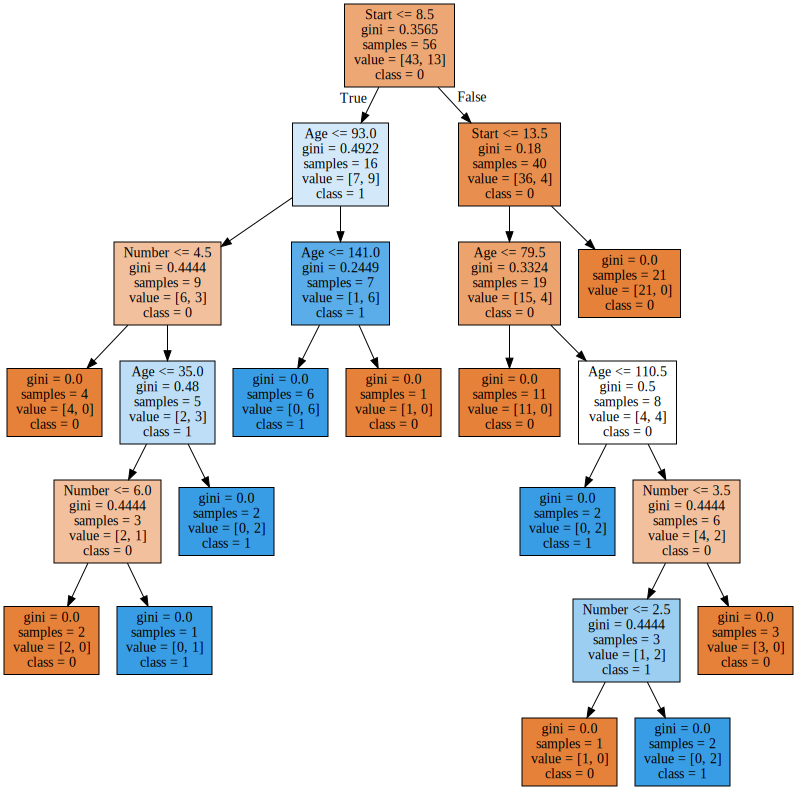

In [19]:
from sklearn import tree
import graphviz
from sklearn.tree import export_graphviz

dot_data = tree.export_graphviz(dct,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

**Apply Random Forest Algo**

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
preds = rfc.predict(X_test)

In [22]:
print(confusion_matrix(y_test,preds))

[[19  2]
 [ 2  2]]


In [23]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

      absent       0.90      0.90      0.90        21
     present       0.50      0.50      0.50         4

    accuracy                           0.84        25
   macro avg       0.70      0.70      0.70        25
weighted avg       0.84      0.84      0.84        25



In [25]:
accuracy_score(y_test, preds)*100

84.0